In [1]:
import numpy as np
from math import comb
import matplotlib.pyplot as plt

In [2]:
ls= [int(x) for x in np.arange(9,16) ]
ms= [ int(x) for x in np.sort(np.append(np.arange(5,9),np.arange(6,9))) ]

#getting the hilbert dimension size
dims= [comb(l,m) for l,m in zip(ls,ms)]

In [3]:
def chaos_classifier(eigenvalues, entropies):
    """Simple, definitive quantum chaos classifier"""
    
    # Fit cubic polynomial
    coeffs = np.polyfit(eigenvalues, entropies, 2)
    poly_fit = np.polyval(coeffs, eigenvalues)
    
    # Calculate R²
    ss_res = np.sum((entropies - poly_fit)**2)
    ss_tot = np.sum((entropies - np.mean(entropies))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

    '''
    # Classification
    if r_squared > 0.6:
        return "Chaotic", r_squared
    elif r_squared < 0.3:
        return "Integrable", r_squared
    else:
        return "Mixed", r_squared
    '''
# Usage
#print(f"System: {classification} (R² = {r2:.3f})")

In [ ]:
def chaos_classifier(eigenvalues, entropies):
    """Use only low-degree polynomials to avoid overfitting"""
    
    # Try degrees 1, 2, 3 only
    max_r2 = 0
    best_degree = 1
    
    for degree in [1, 2, 3]:
        coeffs = np.polyfit(eigenvalues, entropies, degree)
        poly_fit = np.polyval(coeffs, eigenvalues)
        
        ss_res = np.sum((entropies - poly_fit)**2)
        ss_tot = np.sum((entropies - np.mean(entropies))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        if r_squared > max_r2:
            max_r2 = r_squared
            best_degree = degree
    
    return max_r2, best_degree

In [4]:
#data analysis here
#we var for each n group
int_r2=[]
ch_r2=[]

for l,m in zip(ls,ms):
    int_shanons= np.loadtxt(f"/home/ameilioso/krylov/Krylov-Complexity-1/CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient0.0/int_shannonsL{l}M{m}.csv",dtype=complex)
    ch_shanons= np.loadtxt(f"/home/ameilioso/krylov/Krylov-Complexity-1/CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient1.0/ch_shannonsL{l}M{m}.csv",dtype=complex)

    int_eval= np.loadtxt(f"/home/ameilioso/krylov/Krylov-Complexity-1/CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient0.0/int_evalL{l}M{m}.csv",dtype=complex)
    ch_eval= np.loadtxt(f"/home/ameilioso/krylov/Krylov-Complexity-1/CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient1.0/ch_evalL{l}M{m}.csv",dtype=complex)


    int_r2.append(chaos_classifier(int_eval, int_shanons))
    ch_r2.append(chaos_classifier(ch_eval, ch_shanons))



/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


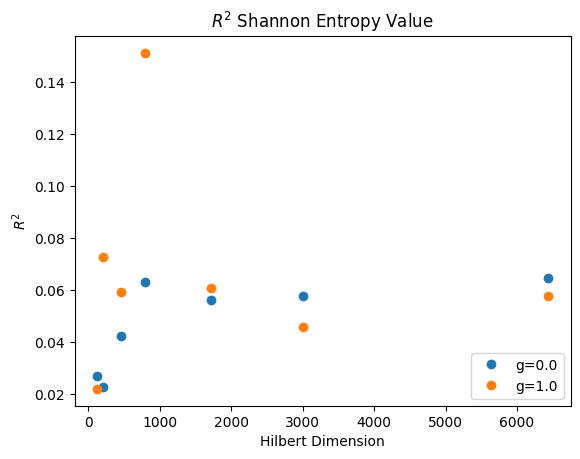

In [5]:
plt.title("$R^2$ Shannon Entropy Value")
plt.ylabel("$R^2$")
plt.xlabel("Hilbert Dimension")
#root n
plt.plot(dims,int_r2,"o",label="g=0.0")
plt.plot(dims,ch_r2,"o",label="g=1.0")

plt.legend(markerscale=1,loc='lower right')
